In [1]:
import shutil
from pathlib import Path

# Base directories
features_dir = Path("/kaggle/input/gog-features/features")
split_idx_dir = Path("/kaggle/input/gog-dota/splt_idx")
positive_video_dir = Path("/kaggle/input/dota-balanced-not-splitted-not-30/videos/positive")
output_dir = Path("/kaggle/working/folds_videos")

# Ordered feature files
ordered_feature_files = sorted(features_dir.glob("*.npz"))

# Pre-create output folders for each fold
for fold in range(1, 6):
    (output_dir / f"fold_{fold}" / "train").mkdir(parents=True, exist_ok=True)
    (output_dir / f"fold_{fold}" / "test").mkdir(parents=True, exist_ok=True)

# Read index file
def read_indices(file_path):
    with open(file_path) as f:
        return [int(line.strip()) for line in f if line.strip().isdigit()]

# Copy only positive videos
for fold in range(1, 6):
    train_indices = read_indices(split_idx_dir / f"fold_{fold}_train.txt")
    test_indices = read_indices(split_idx_dir / f"fold_{fold}_test.txt")

    for idx in train_indices + test_indices:
        feature_file = ordered_feature_files[idx]
        video_name = feature_file.stem + ".avi"

        # Only look in the positive folder
        video_path = positive_video_dir / video_name
        if not video_path.exists():
            continue

        dest_subfolder = "train" if idx in train_indices else "test"
        dst = output_dir / f"fold_{fold}" / dest_subfolder / video_name
        shutil.copy(video_path, dst)

print("✅ Positive-only video folds created.")

✅ Positive-only video folds created.


In [2]:
!pip install -q ultralytics filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.8 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 157MB/s]


Fold 1: Processing Hd2IzHAfkCI_002211.avi

0: 384x640 2 cars, 348.9ms
Speed: 15.6ms preprocess, 348.9ms inference, 23.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 169.5ms
Speed: 4.4ms preprocess, 169.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 161.0ms
Speed: 4.0ms preprocess, 161.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 161.1ms
Speed: 2.9ms preprocess, 161.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 162.7ms
Speed: 3.5ms preprocess, 162.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 166.6ms
Speed: 4.0ms preprocess, 166.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 161.1ms
Speed: 4.0ms preprocess, 161.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 traffic light, 170.9ms
Speed: 3.3ms preprocess, 170.9ms 

/tmp/ipykernel_13/1237087415.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fold = pd.concat(all_df, ignore_index=True)
/tmp/ipykernel_13/1237087415.py:162: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_fold.replace([np.inf, -np.inf], np.nan).dropna(subset=["ttc", "true_ttc"])


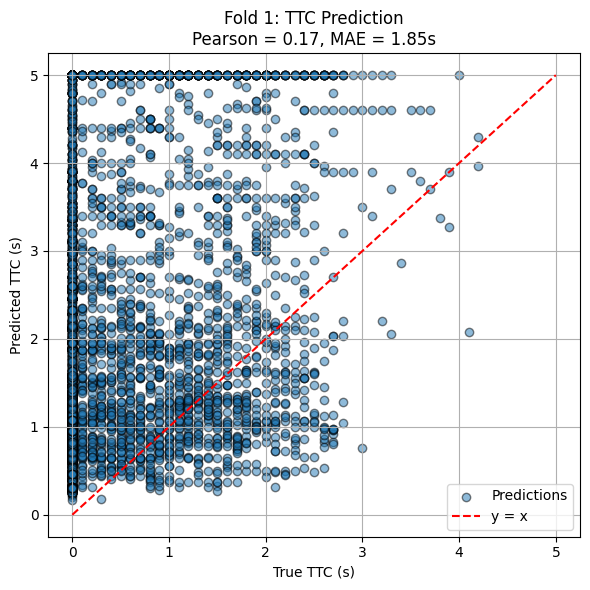

Fold 2: Processing xVfPBzDnI2Q_003219.avi

0: 384x640 2 cars, 3 traffic lights, 180.9ms
Speed: 3.9ms preprocess, 180.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 3 traffic lights, 163.0ms
Speed: 4.0ms preprocess, 163.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 3 traffic lights, 155.5ms
Speed: 3.8ms preprocess, 155.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 cars, 2 traffic lights, 158.5ms
Speed: 4.2ms preprocess, 158.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 traffic lights, 148.4ms
Speed: 3.9ms preprocess, 148.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 2 traffic lights, 172.8ms
Speed: 4.9ms preprocess, 172.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 1 traffic light, 154.0ms
Speed: 5.1ms preproce

/tmp/ipykernel_13/1237087415.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fold = pd.concat(all_df, ignore_index=True)
/tmp/ipykernel_13/1237087415.py:162: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_fold.replace([np.inf, -np.inf], np.nan).dropna(subset=["ttc", "true_ttc"])


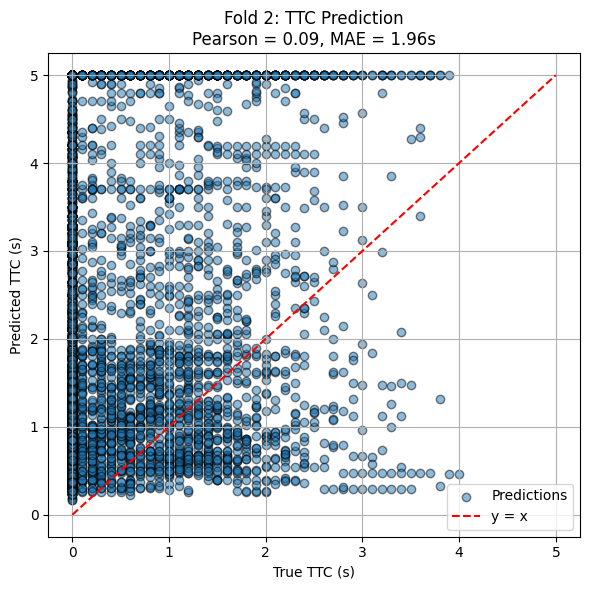

Fold 3: Processing eWWgJznGg6U_002482.avi

0: 384x640 (no detections), 146.0ms
Speed: 2.9ms preprocess, 146.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 train, 158.3ms
Speed: 3.0ms preprocess, 158.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 train, 173.3ms
Speed: 2.8ms preprocess, 173.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 train, 155.6ms
Speed: 2.8ms preprocess, 155.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 airplane, 139.0ms
Speed: 4.5ms preprocess, 139.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 train, 151.7ms
Speed: 3.9ms preprocess, 151.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 train, 152.2ms
Speed: 3.5ms preprocess, 152.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 train, 165.0ms
Speed: 2.8ms preprocess, 165.

/tmp/ipykernel_13/1237087415.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fold = pd.concat(all_df, ignore_index=True)
/tmp/ipykernel_13/1237087415.py:162: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_fold.replace([np.inf, -np.inf], np.nan).dropna(subset=["ttc", "true_ttc"])


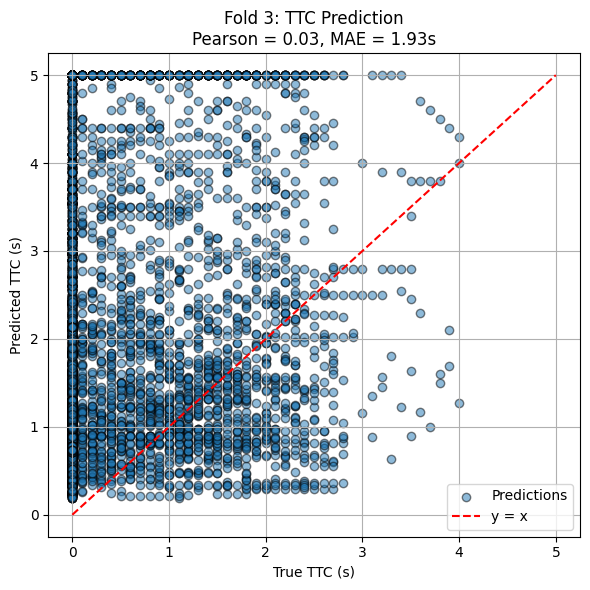

Fold 4: Processing PfJ2CudpCgE_005782.avi

0: 384x640 1 car, 2 trucks, 1 traffic light, 161.6ms
Speed: 4.7ms preprocess, 161.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 bus, 2 trucks, 1 traffic light, 171.6ms
Speed: 2.8ms preprocess, 171.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 1 traffic light, 181.5ms
Speed: 3.2ms preprocess, 181.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 2 trucks, 1 traffic light, 172.6ms
Speed: 3.4ms preprocess, 172.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 bus, 2 trucks, 1 traffic light, 166.3ms
Speed: 3.2ms preprocess, 166.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 1 traffic light, 150.2ms
Speed: 3.1ms preprocess, 150.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 ca

/tmp/ipykernel_13/1237087415.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fold = pd.concat(all_df, ignore_index=True)
/tmp/ipykernel_13/1237087415.py:162: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_fold.replace([np.inf, -np.inf], np.nan).dropna(subset=["ttc", "true_ttc"])


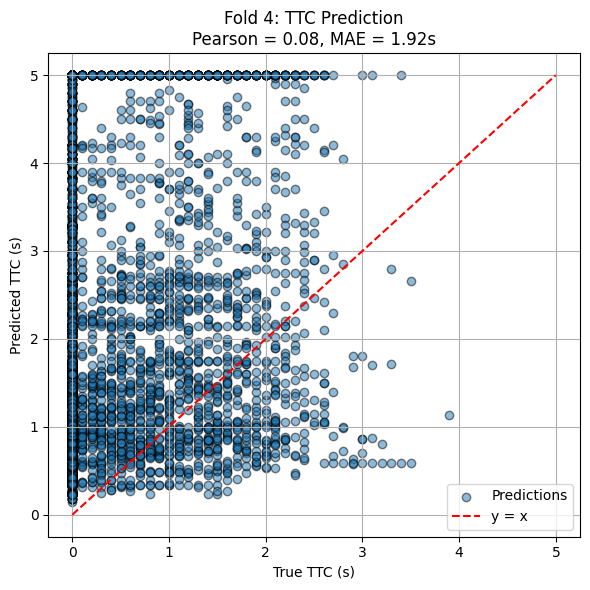

Fold 5: Processing xVfPBzDnI2Q_002101.avi

0: 384x640 1 traffic light, 1 clock, 170.1ms
Speed: 5.6ms preprocess, 170.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 143.3ms
Speed: 3.3ms preprocess, 143.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 166.8ms
Speed: 3.0ms preprocess, 166.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 165.6ms
Speed: 3.0ms preprocess, 165.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 137.3ms
Speed: 2.3ms preprocess, 137.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 178.7ms
Speed: 2.7ms preprocess, 178.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 149.5ms
Speed: 3.2ms preprocess, 149.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 153.6ms
Speed: 3.8ms preprocess, 153.6ms in

/tmp/ipykernel_13/1237087415.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fold = pd.concat(all_df, ignore_index=True)
/tmp/ipykernel_13/1237087415.py:162: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_fold.replace([np.inf, -np.inf], np.nan).dropna(subset=["ttc", "true_ttc"])


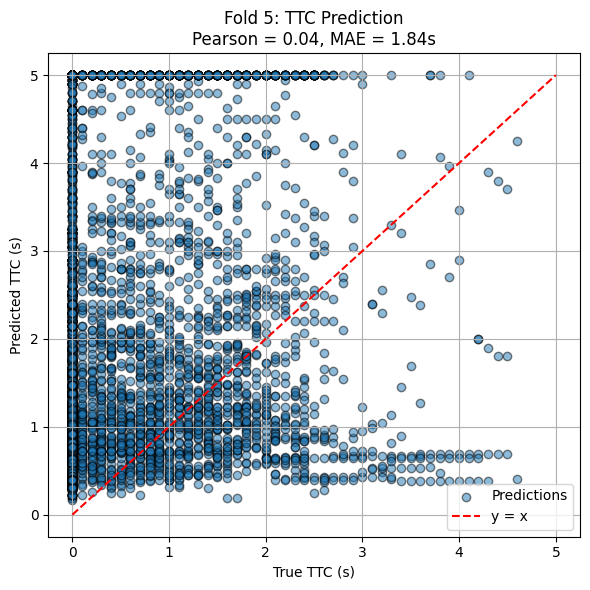


=== TTC Prediction Evaluation Summary ===
Fold 1: Pearson = 0.1662, MAE = 1.85s
Fold 2: Pearson = 0.0919, MAE = 1.96s
Fold 3: Pearson = 0.0321, MAE = 1.93s
Fold 4: Pearson = 0.0763, MAE = 1.92s
Fold 5: Pearson = 0.0394, MAE = 1.84s

Average Pearson Correlation: 0.0812
Average MAE: 1.90s


In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from ultralytics import YOLO
from filterpy.kalman import KalmanFilter
from scipy.optimize import linear_sum_assignment

# Load YOLOv8 model
model = YOLO("yolov8n.pt")
vehicle_labels = {'car', 'truck', 'bus', 'motorbike', 'bicycle'}
dt = 1 / 10  # 10 FPS
video_duration = 5.0  # seconds

# Track class
class Track:
    def __init__(self, box, track_id):
        self.kf = KalmanFilter(dim_x=8, dim_z=4)
        self.kf.F = np.eye(8)
        for i in range(4):
            self.kf.F[i, i+4] = dt
        self.kf.H = np.eye(4, 8)
        self.kf.P *= 10.
        self.kf.R *= 1.
        self.kf.Q = np.eye(8) * 0.01
        x, y, w, h = box
        self.kf.x = np.array([x, y, w, h, 0, 0, 0, 0], dtype=float)
        self.prev_w = w
        self.curr_w = w
        self.age = 0
        self.id = track_id

    def predict(self):
        self.kf.predict()
        self.age += 1
        return self.kf.x[:4].astype(int)

    def update(self, box):
        self.prev_w = self.curr_w
        self.curr_w = box[2]
        self.kf.update(np.array(box, dtype=float))
        self.age = 0

    def compute_ttc(self):
        epsilon = 1e-6
        if self.prev_w <= 0 or self.curr_w <= 0:
            return float('inf')
        S = self.curr_w / (self.prev_w + epsilon)
        if S <= 1.0:
            return float('inf')  # Not approaching
        ttc = dt * S / (S - 1 + epsilon)
        return min(ttc, video_duration)

# IOU for matching
def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = boxA[2] * boxA[3]
    areaB = boxB[2] * boxB[3]
    return inter / float(areaA + areaB - inter + 1e-6)

# Detection
def detect_vehicles(frame):
    results = model(frame)[0]
    boxes = []
    for box in results.boxes.data:
        x1, y1, x2, y2, conf, cls = box.tolist()
        label = model.names[int(cls)]
        if label in vehicle_labels and conf > 0.5:
            w, h = x2 - x1, y2 - y1
            boxes.append([int(x1), int(y1), int(w), int(h)])
    return boxes

# Ego lane filtering
def is_in_ego_lane(box, frame_width, margin_ratio=0.33):
    x, y, w, h = box
    center_x = x + w / 2
    left_bound = frame_width * ((1 - margin_ratio) / 2)
    right_bound = frame_width * (1 - (1 - margin_ratio) / 2)
    return left_bound <= center_x <= right_bound

# Tracking update
def update_tracks(detections, tracks, next_id, max_age=10):
    preds = [trk.predict() for trk in tracks]
    iou_matrix = np.zeros((len(preds), len(detections)))
    for i, p in enumerate(preds):
        for j, d in enumerate(detections):
            iou_matrix[i, j] = iou(p, d)
    cost = 1 - iou_matrix
    row_idx, col_idx = linear_sum_assignment(cost)
    assigned_tracks, assigned_dets = set(), set()
    for r, c in zip(row_idx, col_idx):
        if iou_matrix[r, c] > 0.3:
            tracks[r].update(detections[c])
            assigned_tracks.add(r)
            assigned_dets.add(c)
    for j, det in enumerate(detections):
        if j not in assigned_dets:
            tracks.append(Track(det, next_id))
            next_id += 1
    tracks[:] = [t for i, t in enumerate(tracks) if i in assigned_tracks or t.age < max_age]
    return tracks, next_id

# Ground truth frame reader
def get_accident_frame(video_path):
    base = os.path.splitext(os.path.basename(video_path))[0]
    gt_path = f"/kaggle/input/dota-balanced-not-splitted-not-30/toas/{base}.txt"
    with open(gt_path, 'r') as f:
        return int(f.read().strip())

# Process one video
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    log = []
    tracks = []
    next_id = 0
    acc_frame = get_accident_frame(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        detections = detect_vehicles(frame)
        tracks, next_id = update_tracks(detections, tracks, next_id)
        for trk in tracks:
            box = trk.kf.x[:4].astype(int)
            if not is_in_ego_lane(box, frame_width):
                continue  # Skip if outside ego lane
            ttc = trk.compute_ttc()
            true_ttc = max(0.0, round((acc_frame - frame_id) / 10, 2))
            ttc = round(ttc, 2)
            if 0 <= ttc <= video_duration:
                log.append((frame_id, trk.id, ttc, true_ttc))
        frame_id += 1

    cap.release()
    df = pd.DataFrame(log, columns=["frame", "track_id", "ttc", "true_ttc"])
    return df

# Process a fold
def process_fold(fold_path, fold_num):
    video_files = [os.path.join(fold_path, f) for f in os.listdir(fold_path) if f.endswith(".avi")]
    all_df = []
    for vpath in video_files:
        print(f"Fold {fold_num}: Processing {os.path.basename(vpath)}")
        try:
            df = process_video(vpath)
            all_df.append(df)
        except Exception as e:
            print(f"Error with {vpath}: {e}")
    if not all_df:
        return None, None

    df_fold = pd.concat(all_df, ignore_index=True)
    df_clean = df_fold.replace([np.inf, -np.inf], np.nan).dropna(subset=["ttc", "true_ttc"])
    pearson = df_clean["ttc"].corr(df_clean["true_ttc"])
    mae = mean_absolute_error(df_clean["true_ttc"], df_clean["ttc"])

    print(f"Fold {fold_num} Pearson Correlation: {pearson:.4f}")
    print(f"Fold {fold_num} MAE: {mae:.2f} seconds")

    plt.figure(figsize=(6, 6))
    plt.scatter(df_clean["true_ttc"], df_clean["ttc"], alpha=0.5, edgecolor='k', label="Predictions")
    max_ttc = max(df_clean["true_ttc"].max(), df_clean["ttc"].max())
    plt.plot([0, max_ttc], [0, max_ttc], 'r--', label="y = x")
    plt.xlabel("True TTC (s)")
    plt.ylabel("Predicted TTC (s)")
    plt.title(f"Fold {fold_num}: TTC Prediction\nPearson = {pearson:.2f}, MAE = {mae:.2f}s")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    os.makedirs("/kaggle/working/ttc_plots", exist_ok=True)
    plt.savefig(f"/kaggle/working/ttc_plots/fold_{fold_num}_ttc_plot.png")
    plt.show()

    return pearson, mae

# Run all folds
fold_paths = [f"/kaggle/working/folds_videos/fold_{i}/test" for i in range(1, 6)]
all_results = []

for i, path in enumerate(fold_paths, start=1):
    corr, mae = process_fold(path, i)
    if corr is not None and mae is not None:
        all_results.append((f"Fold {i}", corr, mae))

# Summary
print("\n=== TTC Prediction Evaluation Summary ===")
for name, corr, mae in all_results:
    print(f"{name}: Pearson = {corr:.4f}, MAE = {mae:.2f}s")

if all_results:
    mean_corr = np.mean([c for _, c, _ in all_results])
    mean_mae = np.mean([m for _, _, m in all_results])
    print(f"\nAverage Pearson Correlation: {mean_corr:.4f}")
    print(f"Average MAE: {mean_mae:.2f}s")